In [1]:
import sklearn.tree
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import sklearn.cluster
import sklearn.datasets

 # Importing and Cleaning Rent data 

In [2]:


rent = pandas.read_csv('/Users/nerenevaz/Downloads/FA13-2016-17.csv')
rent.dropna(inplace=True)
rent['DateLodgement'] = pandas.to_datetime(rent.DateLodgement,format='%m/%d/%Y')
rent['DateTenancyCommenced'] = pandas.to_datetime(rent.DateTenancyCommenced,format='%m/%d/%Y')
rent['BondAmount'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['PremisesWeeklyRent'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
rent['BondAmount'] = rent['BondAmount'].convert_objects(convert_numeric=True)
rent['PremisesWeeklyRent'] = rent['PremisesWeeklyRent'].convert_objects(convert_numeric=True)
rent['DateLodgement'] = rent['DateLodgement'].apply(lambda x: x.strftime('%Y'))    
rent['DateTenancyCommenced'] = rent['DateTenancyCommenced'].apply(lambda x: x.strftime('%Y'))
rent['Premises_Postcode'] = rent['Premises_Postcode'].convert_objects(convert_numeric=True)
result = rent.groupby(['DateLodgement','Premises_Postcode','Premises_Suburb'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
rent_mean = result.reset_index(drop=True)
rent_mean = rent_mean[(rent_mean['Premises_Postcode'] >= 2000) & (rent_mean['Premises_Postcode'] <= 2250)]
rent_mean.Premises_Postcode = rent_mean.Premises_Postcode.round()
rent_mean.PremisesWeeklyRent = rent_mean.PremisesWeeklyRent.round()
rent_mean.head(5)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/nerenevaz/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


,DateLodgement,Premises_Postcode,Premises_Suburb,PremisesWeeklyRent
,,,,mean
1,2013,2000.0,DAWES POINT,1400.0
2,2013,2000.0,HAYMARKET,515.0
3,2013,2000.0,KING ST WHARF,800.0
4,2013,2000.0,KING STREET WHARF,1300.0
5,2013,2000.0,MILLERS POINT,631.0


In [3]:
# Creating a Weekly mean rent by year from the Rent data

Weekly_Mean_Rent = rent_mean[['Premises_Postcode','DateLodgement','PremisesWeeklyRent']]
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.swaplevel(0, 1)
Weekly_Mean_Rent.sortlevel(1, axis=1, inplace=True)
Weekly_Mean_Rent.columns = Weekly_Mean_Rent.columns.droplevel(-1)
Weekly_Mean_Rent.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent
results = Weekly_Mean_Rent.groupby(['DateLodgement','Premises_Postcode'], as_index=False).agg(
                      {'PremisesWeeklyRent':['mean']})
results.columns = results.columns.swaplevel(0, 1)
results.sortlevel(1, axis=1, inplace=True)
results.columns = results.columns.droplevel(-1)
results.columns = ['PremisesWeeklyRent','Premises_Postcode','DateLodgement']
Weekly_Mean_Rent = results
Weekly_Mean_Rent = Weekly_Mean_Rent.pivot(index='Premises_Postcode', columns='DateLodgement', values='PremisesWeeklyRent')
Weekly_Mean_Rent.head(10)

/Users/nerenevaz/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:3312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, sort_remaining=sort_remaining)


DateLodgement,2013,2014,2015,2016
Premises_Postcode,,,,
2000.0,986.125000,944.428571,1231.250000,1228.857143
2007.0,640.500000,623.000000,518.000000,414.000000
2008.0,625.000000,659.666667,436.333333,505.000000
2009.0,751.500000,726.000000,726.000000,744.000000
2010.0,614.000000,621.333333,615.666667,641.000000
2011.0,568.000000,574.833333,622.833333,626.166667
2012.0,630.000000,NaN,670.000000,NaN
2015.0,566.666667,729.000000,571.333333,553.000000
2016.0,451.666667,569.000000,479.333333,491.000000


# Importing Crime Statistics

In [4]:


police_stats = pandas.read_csv('/Users/nerenevaz/Downloads/PostcodeData2015.csv',index_col='Postcode')

# Cleaning the Crime data

In [5]:


Offences = police_stats[['Offence category','Jan 2013',
 'Feb 2013',
 'Mar 2013',
 'Apr 2013',
 'May 2013',
 'Jun 2013',
 'Jul 2013',
 'Aug 2013',
 'Sep 2013',
 'Oct 2013',
 'Nov 2013',
 'Dec 2013',
 'Jan 2014',
 'Feb 2014',
 'Mar 2014',
 'Apr 2014',
 'May 2014',
 'Jun 2014',
 'Jul 2014',
 'Aug 2014',
 'Sep 2014',
 'Oct 2014',
 'Nov 2014',
 'Dec 2014',
 'Jan 2015',
 'Feb 2015',
 'Mar 2015',
 'Apr 2015',
 'May 2015',
 'Jun 2015',
 'Jul 2015',
 'Aug 2015',
 'Sep 2015',
 'Oct 2015',
 'Nov 2015',
 'Dec 2015']]
Offences_2013 = Offences.filter(like = '2013')
Offences_2013['2013'] = Offences_2013.sum(axis=1)
Offences_2013 = Offences_2013[['2013']]
Offences_2014 = Offences.filter(like = '2014')
Offences_2014['2014'] = Offences_2014.sum(axis=1)
Offences_2014 = Offences_2014[['2014']]
Offences_2015 = Offences.filter(like = '2015')
Offences_2015['2015'] = Offences_2015.sum(axis=1)
Offences_2015 = Offences_2015[['2015']]
Offences1 = Offences[['Offence category']]
Offences1.reset_index()
Offences = pandas.concat([Offences1, Offences_2013, Offences_2014,Offences_2015], axis=1, join_axes=[Offences1.index])
Offences.reset_index()
Offence = Offences.reset_index(drop=False)
Crime = Offence.groupby(['Postcode', 'Offence category'], as_index=False).sum()
Crime = Crime[(Crime['Postcode'] >= 2000) & (Crime['Postcode'] <= 2250)]
Crime.head(5)

,Postcode,Offence category,2013,2014,2015
0,2000,Abduction and kidnapping,3,5,0
1,2000,Against justice procedures,900,760,727
2,2000,Arson,10,4,8
3,2000,Assault,1778,1603,1720
4,2000,Betting and gaming offences,0,2,0


In [6]:
Crime = Crime.pivot(index='Postcode', columns='Offence category')
Crime.head(5)

2013                                   \
Offence category Abduction and kidnapping Against justice procedures Arson   
Postcode                                                                     
2000                                  3.0                      900.0  10.0   
2006                                  0.0                       17.0   0.0   
2007                                  0.0                       11.0   5.0   
2008                                  0.0                       17.0   5.0   
2009                                  0.0                       25.0   0.0   

                                                                              \
Offence category Assault Betting and gaming offences Blackmail and extortion   
Postcode                                                                       
2000              1778.0                         0.0                     3.0   
2006                29.0                         NaN                     1.0   
2007                67.0                         0.0                     0.0   
2008                89.0                         0.0                     1.0   
2009               162.0                        16.0                     0.0   

                                                   \
Offence category Disorderly conduct Drug offences   
Postcode                                            
2000                          975.0        1841.0   
2006                           10.0          21.0   
2007                           22.0          53.0   
2008                           33.0          52.0   
2009                           32.0         200.0   

                                                                         \
Offence category Harassment, threatening behaviour and private nuisance   
Postcode                                                                  
2000                                                          296.0       
2006                                                            9.0       
2007                                                           18.0       
2008                                                           16.0       
2009                                                           35.0       

                                       ...               \
Offence category Homicide              ...                
Postcode                               ...                
2000                  2.0              ...                
2006                  0.0              ...                
2007                  0.0              ...                
2008                  0.0              ...                
2009                  0.0              ...                

                                         2015                 \
Offence category Malicious damage to property Other offences   
Postcode                                                       
2000                                    647.0          704.0   
2006                                     28.0            4.0   
2007                                     47.0           22.0   
2008                                     79.0           10.0   
2009                                     87.0           88.0   

                                                                         \
Offence category Other offences against the person Pornography offences   
Postcode                                                                  
2000                                          17.0                  4.0   
2006                                           1.0                  0.0   
2007                                           1.0                  0.0   
2008                                           0.0                  0.0   
2009                                           3.0                  0.0   

                                                            \
Offence category Prohibited and regulated weapons offences   
Postcode                          

In [7]:
Rent_Crime = pandas.concat([Crime, Weekly_Mean_Rent], axis=1, join_axes=[Crime.index])
Rent_Crime.reset_index(inplace=True)

In [8]:
Rent_Crime.drop('2016', 1,inplace=True)
Rent_Crime.fillna(Rent_Crime.mean(),inplace=True)
Rent_Crime.head(5)

,Postcode,"(2013, Abduction and kidnapping)","(2013, Against justice procedures)","(2013, Arson)","(2013, Assault)","(2013, Betting and gaming offences)","(2013, Blackmail and extortion)","(2013, Disorderly conduct)","(2013, Drug offences)","(2013, Harassment, threatening behaviour and private nuisance)",...,"(2015, Pornography offences)","(2015, Prohibited and regulated weapons offences)","(2015, Prostitution offences)","(2015, Robbery)","(2015, Sexual offences)","(2015, Theft)","(2015, Transport regulatory offences)",2013,2014,2015
0,2000,3.0,900.0,10.0,1778.0,0.000000,3.0,975.0,1841.0,296.0,...,4.0,212.0,0.000000,107.0,195.0,7856.0,6310.0,986.125000,944.428571,1231.250000
1,2006,0.0,17.0,0.0,29.0,0.289474,1.0,10.0,21.0,9.0,...,0.0,10.0,1.168317,4.0,8.0,232.0,5.0,828.266107,611.506082,713.847004
2,2007,0.0,11.0,5.0,67.0,0.000000,0.0,22.0,53.0,18.0,...,0.0,12.0,1.168317,16.0,22.0,742.0,17.0,640.500000,623.000000,518.000000
3,2008,0.0,17.0,5.0,89.0,0.000000,1.0,33.0,52.0,16.0,...,0.0,10.0,0.000000,12.0,19.0,477.0,4.0,625.000000,659.666667,436.333333
4,2009,0.0,25.0,0.0,162.0,16.000000,0.0,32.0,200.0,35.0,...,0.0,19.0,0.000000,10.0,17.0,849.0,9.0,751.500000,726.000000,726.000000


# Exporting file to clean column headers in excel and then reimporting it 

In [9]:
Rent_Crime.to_csv('/Users/nerenevaz/Downloads/Rent_Crime.csv')
Rent_vs_Crime = pandas.read_csv('/Users/nerenevaz/Downloads/Rent_Crime_clean.csv')

In [10]:
Rent_vs_Crime = Rent_vs_Crime.round()
Rent_vs_Crime.sample(25)

,Postcode,Crime_2013_Abduction_and_kidnapping,Crime_2013_Against_justice_procedures,Crime_2013_Arson,Crime_2013_Assault,Crime_2013_Betting_and_gaming_offences,Crime_2013_Blackmail_and_extortion,Crime_2013_Disorderly_conduct,Crime_2013_Drug_offences,Crime_2013_Harassment_threatening_behaviour_and_private_nuisance,...,Crime_2015_Pornography_offences,Crime_2015_Prohibited_and_regulated_weapons_offences,Crime_2015_Prostitution_offences,Crime_2015_Robbery,Crime_2015_Sexual_offences,Crime_2015_Theft,Crime_2015_Transport_regulatory_offences,Rent_2013,Rent_2014,Rent_2015
103,2064,0.0,7,2,22,0.0,0.0,8,22,14,...,0.0,3,1.0,2.0,10,316,47.0,566.0,587.0,587.0
121,2174,1.0,4,1,4,0.0,0.0,2,3,2,...,0.0,3,1.0,0.0,1,109,13.0,513.0,524.0,554.0
5,2031,0.0,149,5,187,0.0,0.0,88,365,52,...,4.0,10,0.0,2.0,36,868,10.0,904.0,1112.0,1066.0
0,2049,0.0,25,5,95,0.0,0.0,27,39,17,...,0.0,13,0.0,6.0,12,430,91.0,457.0,457.0,467.0
52,2072,0.0,5,3,16,0.0,0.0,5,27,9,...,0.0,3,1.0,1.0,3,156,119.0,688.0,685.0,706.0
90,2121,0.0,11,6,55,0.0,0.0,15,40,19,...,0.0,2,1.0,1.0,18,327,309.0,574.0,606.0,617.0
150,2200,0.0,569,28,485,1.0,0.0,85,341,269,...,1.0,83,0.0,28.0,58,1972,2247.0,448.0,477.0,504.0
67,2047,0.0,5,0,27,0.0,0.0,10,18,15,...,2.0,2,1.0,4.0,5,335,0.0,653.0,706.0,672.0
92,2154,2.0,172,12,129,0.0,0.0,42,67,61,...,2.0,17,0.0,8.0,37,829,0.0,573.0,611.0,614.0
166,2128,0.0,1,1,19,0.0,0.0,5,20,8,...,0.0,2,0.0,0.0,1,130,0.0,440.0,489.0,472.0


In [11]:
Rent_vs_Crime.columns.unique()

array(['Postcode', 'Crime_2013_Abduction_and_kidnapping',
       'Crime_2013_Against_justice_procedures', 'Crime_2013_Arson',
       'Crime_2013_Assault', 'Crime_2013_Betting_and_gaming_offences',
       'Crime_2013_Blackmail_and_extortion',
       'Crime_2013_Disorderly_conduct', 'Crime_2013_Drug_offences',
       'Crime_2013_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2013_Homicide', 'Crime_2013_Liquor_offences',
       'Crime_2013_Malicious_damage_to_property',
       'Crime_2013_Other_offences',
       'Crime_2013_Other_offences_against_the_person',
       'Crime_2013_Pornography_offences',
       'Crime_2013_Prohibited_and_regulated_weapons_offences',
       'Crime_2013_Prostitution_offences', 'Crime_2013_Robbery',
       'Crime_2013_Sexual_offences', 'Crime_2013_Theft',
       'Crime_2013_Transport_regulatory_offences',
       'Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Ass

# Plotting Rent vs Postcode data

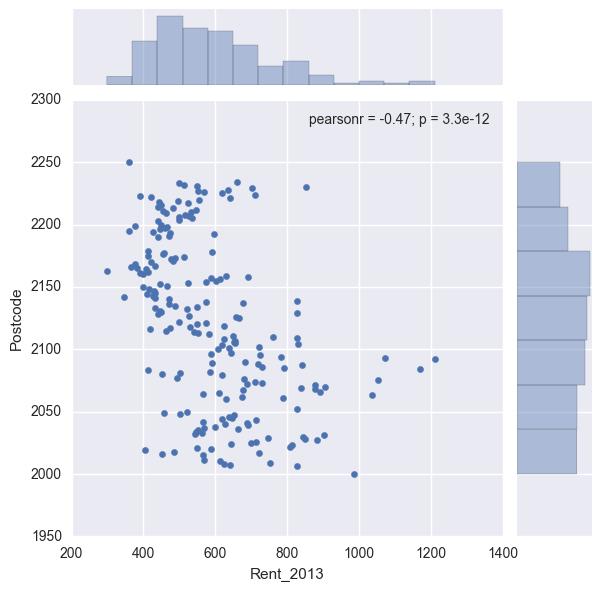

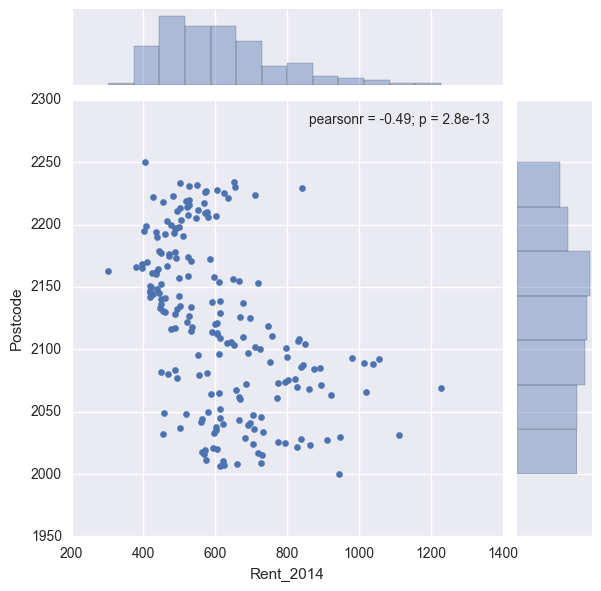

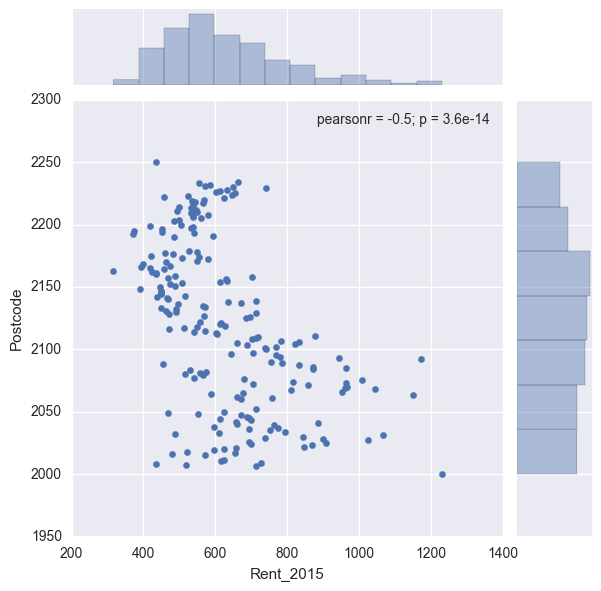

In [12]:
seaborn.jointplot(x='Rent_2013', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2014', y='Postcode', data=Rent_vs_Crime)
seaborn.jointplot(x='Rent_2015', y='Postcode', data=Rent_vs_Crime)

In [13]:
Rent_vs_Crime.set_index('Postcode',inplace=True)

# Splitting Data into 2014 , 2015

In [14]:
Rent_vs_Crime2015 = Rent_vs_Crime.filter(regex=("2015"))
Rent_vs_Crime2015.reset_index(inplace=True)
Rent_vs_Crime2015.sample()

,Postcode,Crime_2015_Abduction_and_kidnapping,Crime_2015_Against_justice_procedures,Crime_2015_Arson,Crime_2015_Assault,Crime_2015_Betting_and_gaming_offences,Crime_2015_Blackmail_and_extortion,Crime_2015_Disorderly_conduct,Crime_2015_Drug_offences,Crime_2015_Harassment_threatening_behaviour_and_private_nuisance,...,Crime_2015_Other_offences,Crime_2015_Other_offences_against_the_person,Crime_2015_Pornography_offences,Crime_2015_Prohibited_and_regulated_weapons_offences,Crime_2015_Prostitution_offences,Crime_2015_Robbery,Crime_2015_Sexual_offences,Crime_2015_Theft,Crime_2015_Transport_regulatory_offences,Rent_2015
1,2144,3.0,309,16,298,0.0,3.0,35,457,161,...,52,7.0,1.0,51,1.0,19.0,29,904,902.0,450.0


In [15]:
Rent_vs_Crime2015.describe()

,Postcode,Crime_2015_Abduction_and_kidnapping,Crime_2015_Against_justice_procedures,Crime_2015_Arson,Crime_2015_Assault,Crime_2015_Betting_and_gaming_offences,Crime_2015_Blackmail_and_extortion,Crime_2015_Disorderly_conduct,Crime_2015_Drug_offences,Crime_2015_Harassment_threatening_behaviour_and_private_nuisance,...,Crime_2015_Other_offences,Crime_2015_Other_offences_against_the_person,Crime_2015_Pornography_offences,Crime_2015_Prohibited_and_regulated_weapons_offences,Crime_2015_Prostitution_offences,Crime_2015_Robbery,Crime_2015_Sexual_offences,Crime_2015_Theft,Crime_2015_Transport_regulatory_offences,Rent_2015
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,...,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,2119.869347,0.522613,115.663317,5.045226,123.487437,0.095477,0.643216,39.628141,146.140704,53.055276,...,33.065327,2.417085,0.909548,19.849246,1.090452,7.698492,19.623116,570.477387,410.974874,626.834171
std,67.173250,1.048443,221.353646,8.561304,184.925343,0.616220,1.019181,77.200921,281.874050,77.698667,...,59.563401,3.429213,1.501467,32.802245,6.599806,13.429936,24.074247,796.137937,1125.802320,165.714424
min,2000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,12.000000,0.000000,316.000000
25%,2065.500000,0.000000,10.000000,1.000000,35.000000,0.000000,0.000000,8.500000,22.500000,14.500000,...,7.000000,0.000000,0.000000,4.500000,0.000000,1.000000,6.500000,178.500000,2.000000,501.500000
50%,2119.000000,0.000000,31.000000,3.000000,70.000000,0.000000,0.000000,18.000000,60.000000,29.000000,...,15.000000,1.000000,0.000000,10.000000,1.000000,3.000000,13.000000,348.000000,15.000000,596.000000
75%,2172.500000,1.000000,77.500000,5.000000,137.000000,0.000000,1.000000,38.500000,146.500000,58.500000,...,36.000000,3.000000,1.000000,20.000000,1.000000,8.000000,23.000000,719.000000,262.500000,710.000000
max,2250.000000,6.000000,1339.000000,69.000000,1720.000000,8.000000,9.000000,802.000000,2345.000000,680.000000,...,704.000000,25.000000,10.000000,243.000000,92.000000,107.000000,195.000000,7856.000000,9668.000000,1231.000000


In [16]:
Rent_vs_Crime2014 = Rent_vs_Crime.filter(regex=("2014"))
Rent_vs_Crime2014.reset_index(inplace=True)
Rent_vs_Crime2014.sample()

,Postcode,Crime_2014_Abduction_and_kidnapping,Crime_2014_Against_justice_procedures,Crime_2014_Arson,Crime_2014_Assault,Crime_2014_Betting_and_gaming_offences,Crime_2014_Blackmail_and_extortion,Crime_2014_Disorderly_conduct,Crime_2014_Drug_offences,Crime_2014_Harassment_threatening_behaviour_and_private_nuisance,...,Crime_2014_Other_offences,Crime_2014_Other_offences_against_the_person,Crime_2014_Pornography_offences,Crime_2014_Prohibited_and_regulated_weapons_offences,Crime_2014_Prostitution_offences,Crime_2014_Robbery,Crime_2014_Sexual_offences,Crime_2014_Theft,Crime_2014_Transport_regulatory_offences,Rent_2014
0,2049,1.0,30,8,111,0.0,0.0,22,73,17,...,6,0.0,0.0,15,0.0,18,22,400,102.0,457.0
1,2144,2.0,327,13,339,0.0,1.0,39,420,186,...,54,11.0,4.0,56,0.0,28,32,1113,499.0,427.0
2,2000,5.0,760,4,1603,2.0,6.0,846,1912,274,...,559,20.0,7.0,183,0.0,94,193,9246,2918.0,944.0
3,2092,0.0,12,1,21,0.0,0.0,3,16,4,...,8,0.0,1.0,5,2.0,1,8,127,0.0,1057.0
4,2063,0.0,4,0,4,0.0,0.0,7,12,7,...,3,1.0,0.0,3,2.0,0,3,100,0.0,923.0
5,2031,1.0,112,1,146,1.0,1.0,57,449,46,...,23,3.0,1.0,9,0.0,5,29,927,8.0,1112.0
6,2068,0.0,10,2,33,0.0,0.0,11,12,34,...,1,2.0,1.0,7,2.0,2,12,244,0.0,860.0
7,2027,0.0,26,0,40,0.0,0.0,14,98,16,...,33,2.0,1.0,11,1.0,3,6,289,23.0,910.0
8,2075,1.0,4,1,32,0.0,1.0,8,23,14,...,3,1.0,0.0,2,2.0,3,15,290,0.0,802.0
9,2070,0.0,3,0,24,0.0,0.0,12,11,10,...,3,4.0,1.0,2,2.0,1,10,179,36.0,827.0


In [17]:
Rent_vs_Crime2014.columns.unique()

array(['Postcode', 'Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting_and_gaming_offences',
       'Crime_2014_Blackmail_and_extortion',
       'Crime_2014_Disorderly_conduct', 'Crime_2014_Drug_offences',
       'Crime_2014_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor_offences',
       'Crime_2014_Malicious_damage_to_property',
       'Crime_2014_Other_offences',
       'Crime_2014_Other_offences_against_the_person',
       'Crime_2014_Pornography_offences',
       'Crime_2014_Prohibited_and_regulated_weapons_offences',
       'Crime_2014_Prostitution_offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual_offences', 'Crime_2014_Theft',
       'Crime_2014_Transport_regulatory_offences', 'Rent_2014'], dtype=object)

# Finding Clusters

In [80]:
from sklearn import preprocessing
rscaler = preprocessing.RobustScaler()
x_scaled = rscaler.fit_transform(Rent_vs_Crime2015)
df_normalized = pandas.DataFrame(x_scaled)

In [88]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] # which of these is best?
X = df_normalized

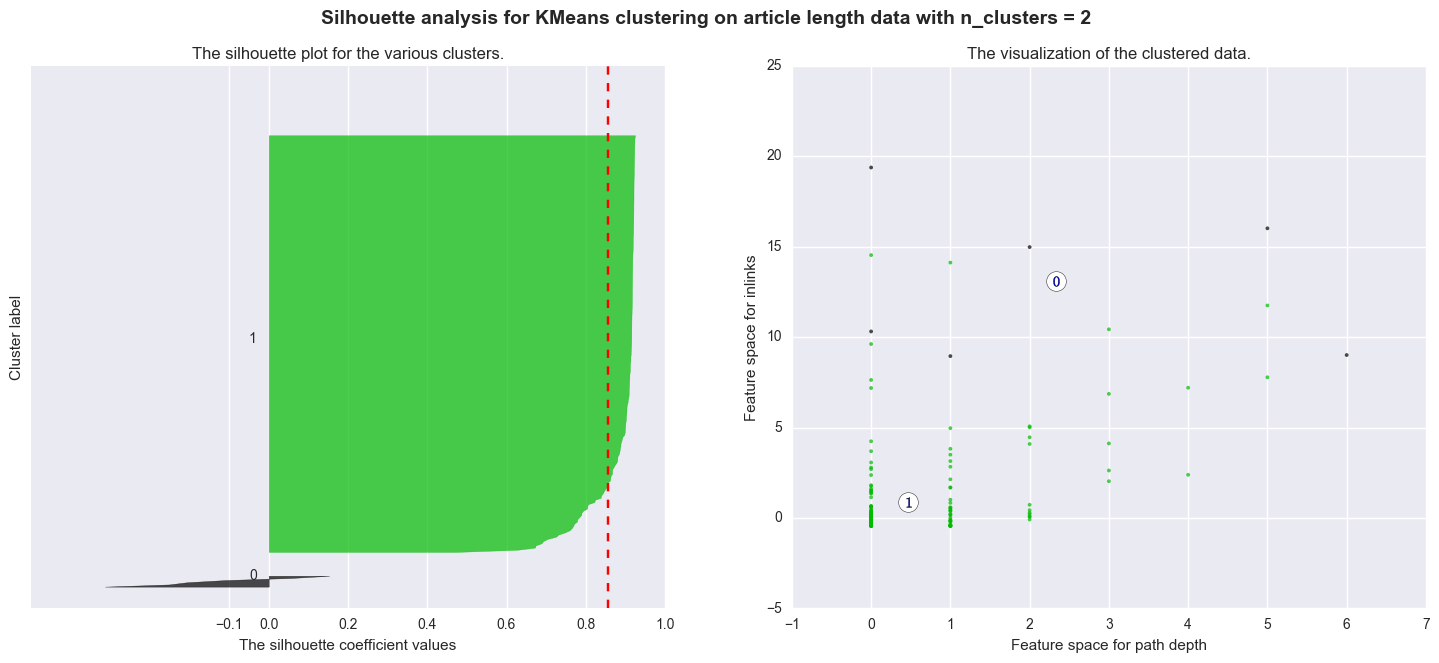

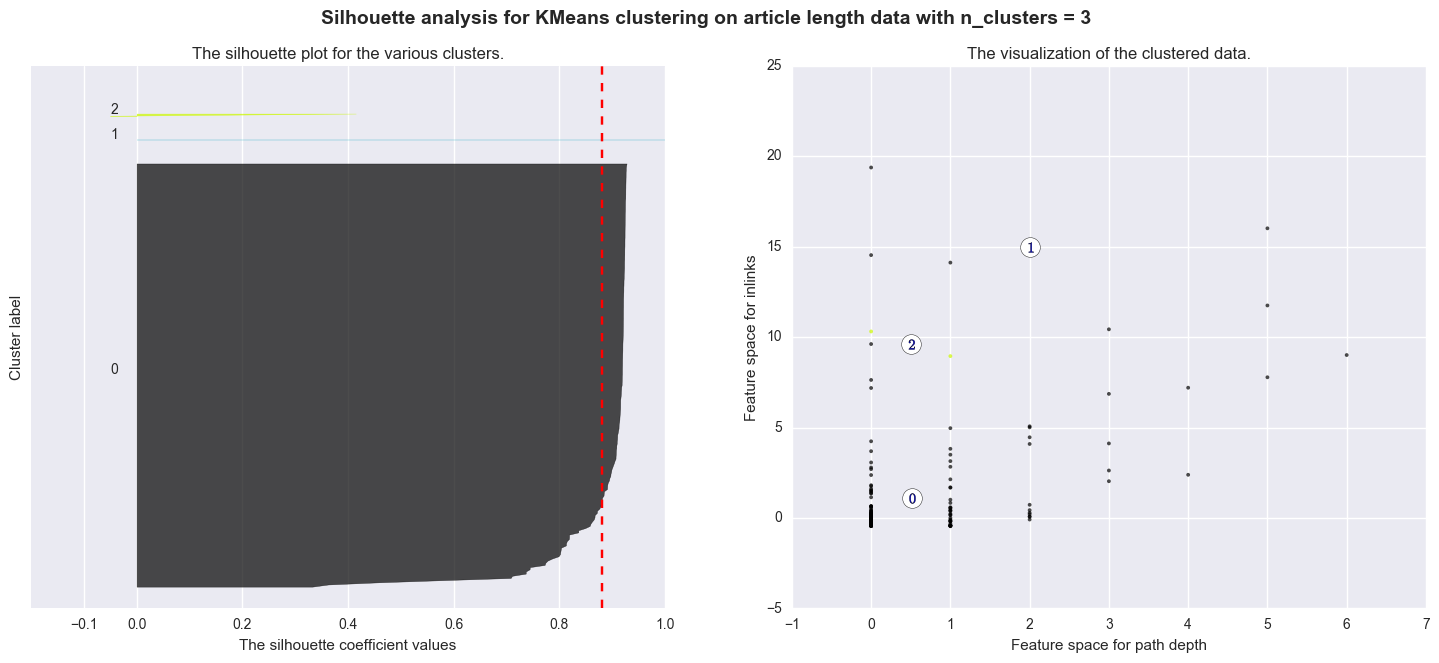

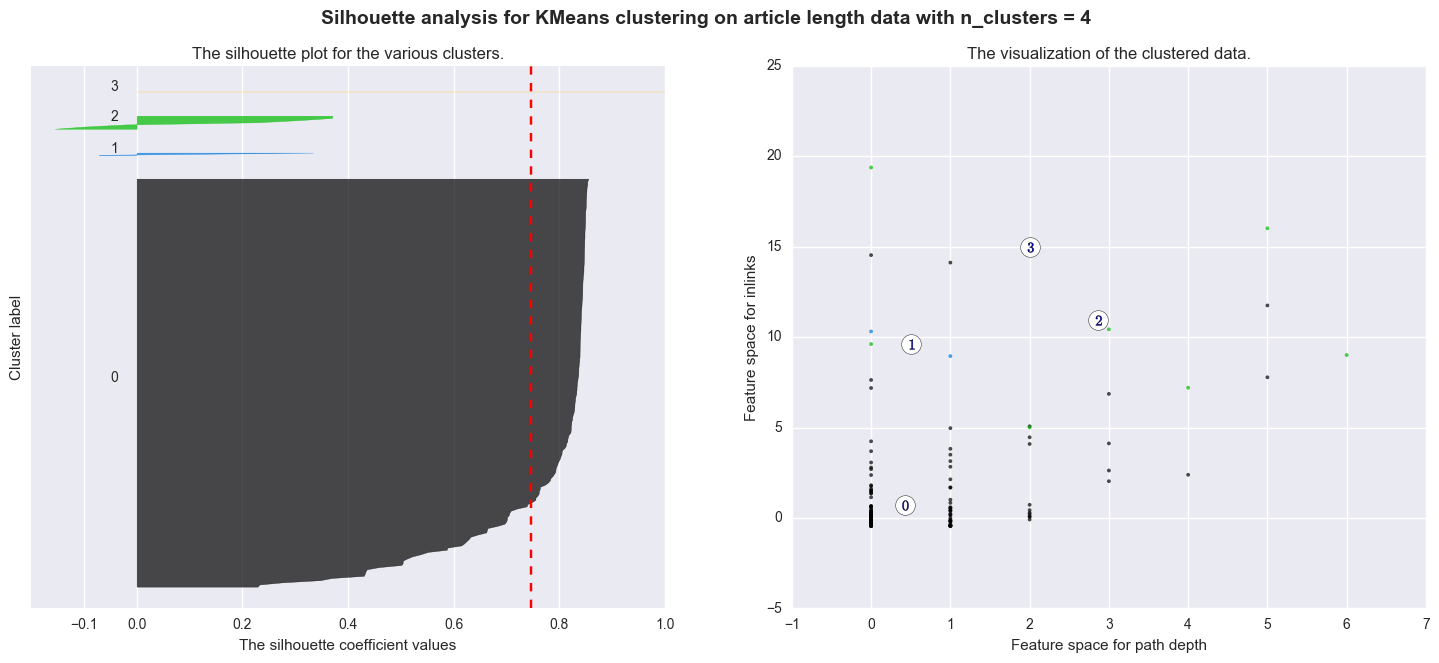

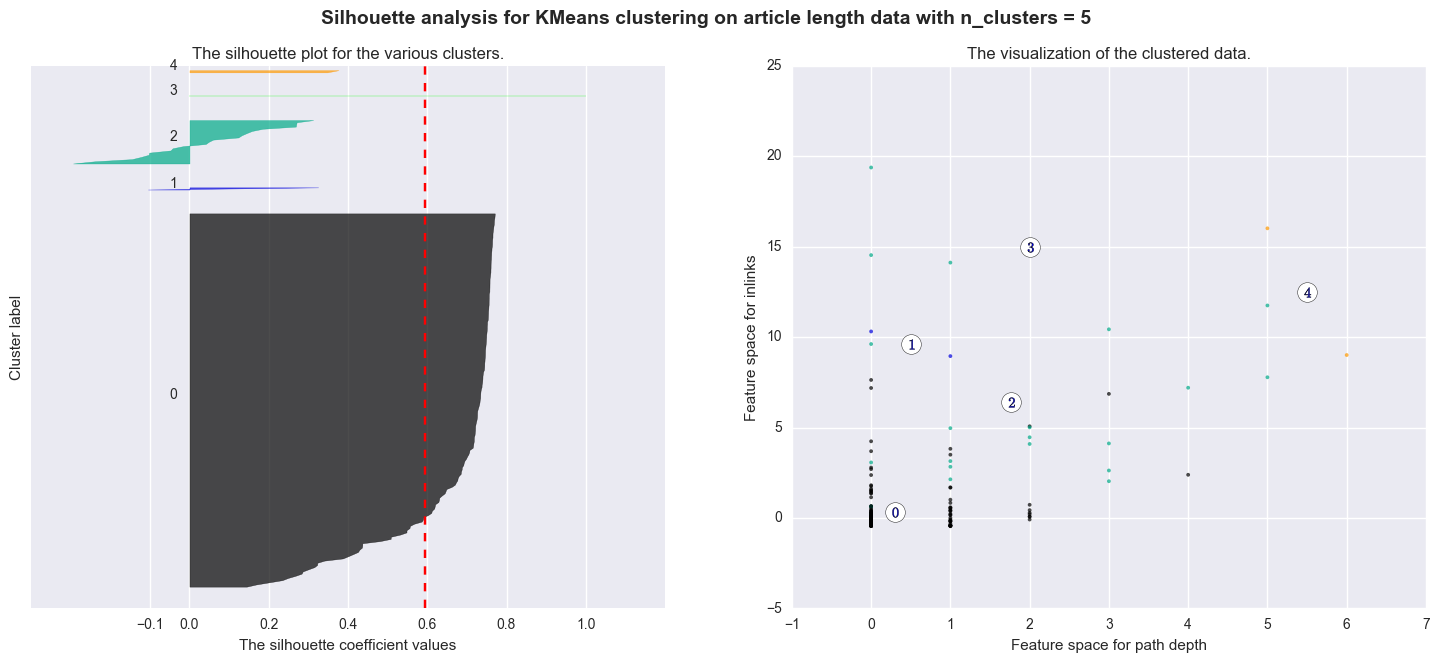

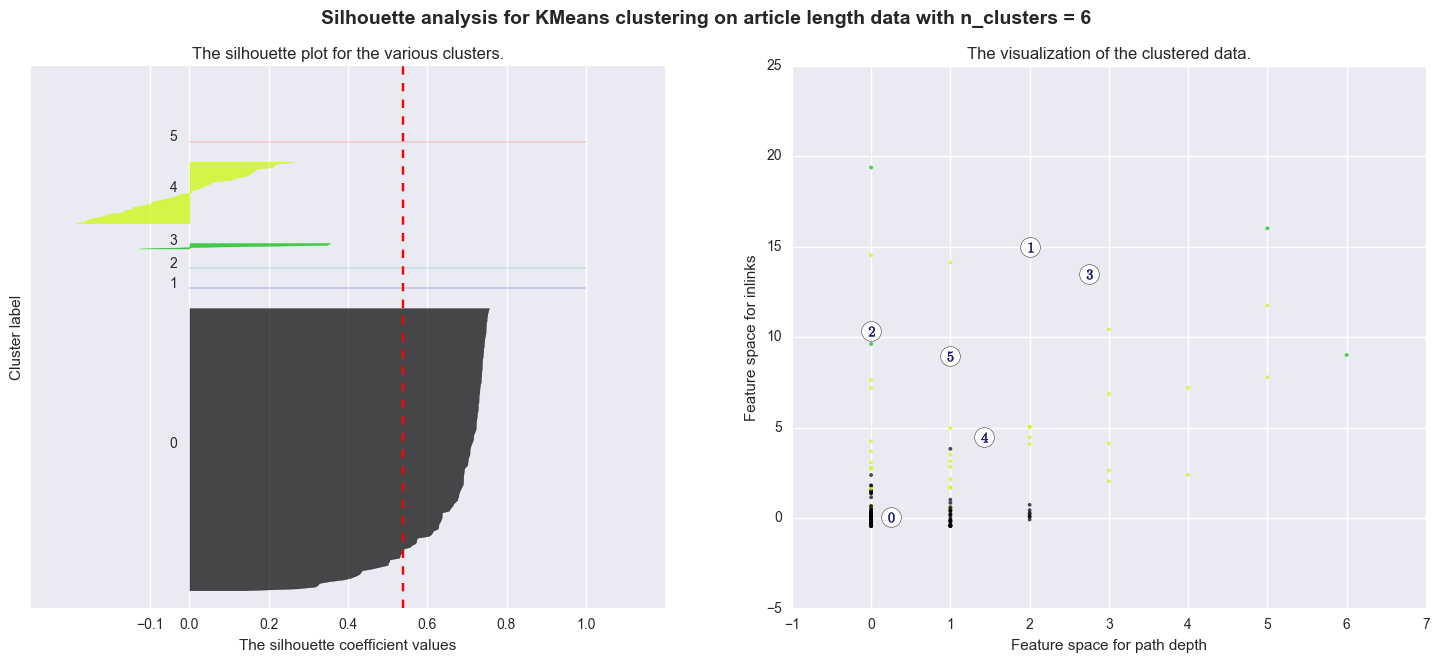

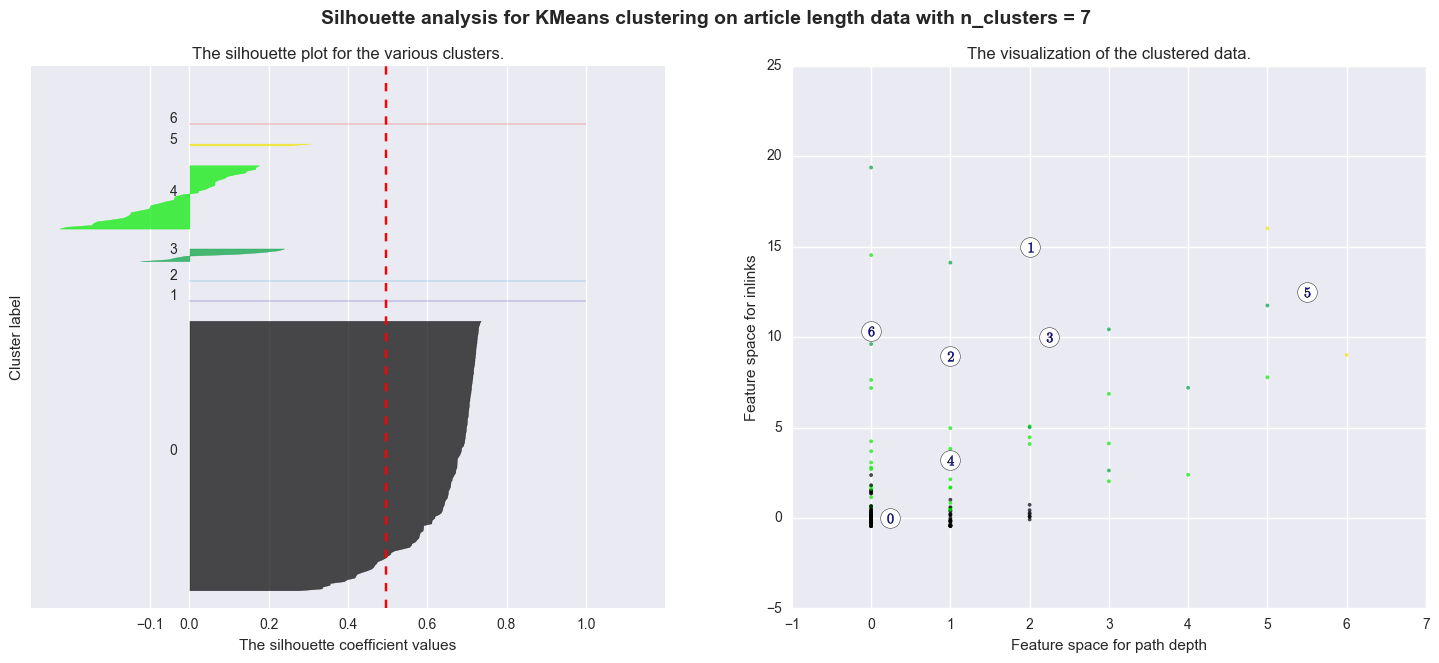

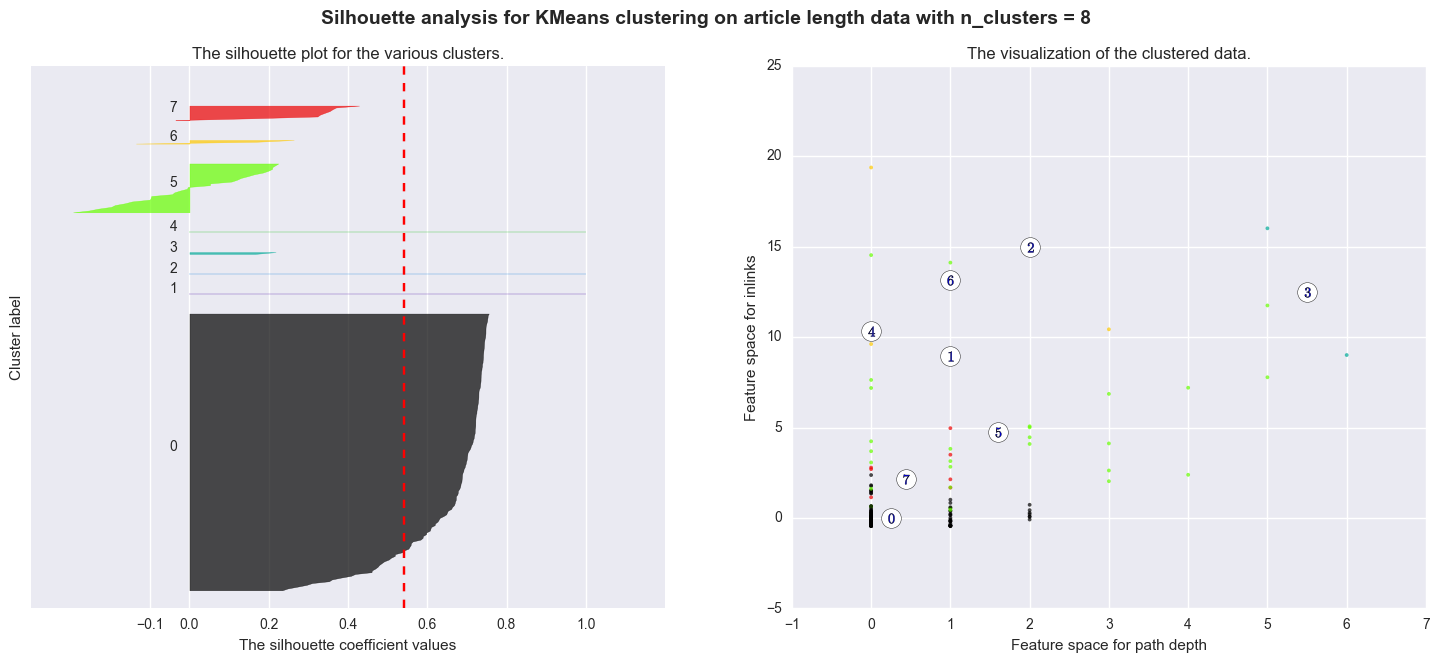

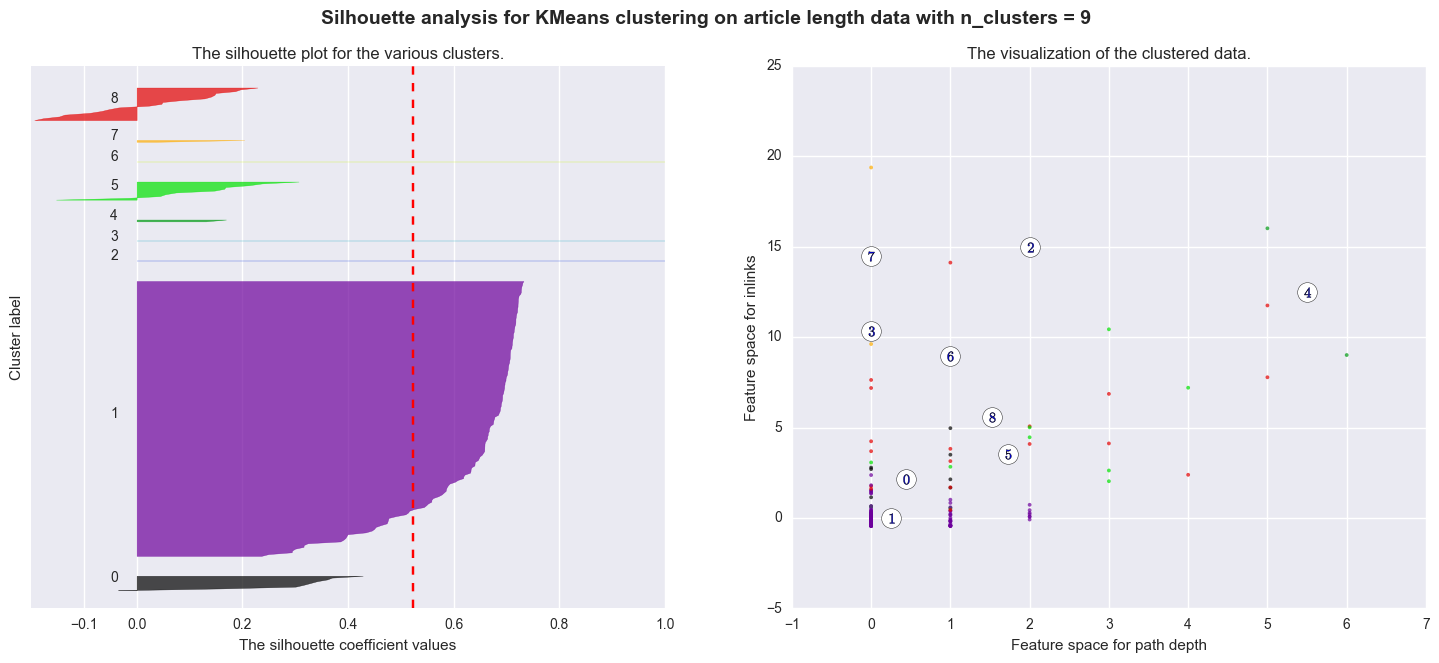

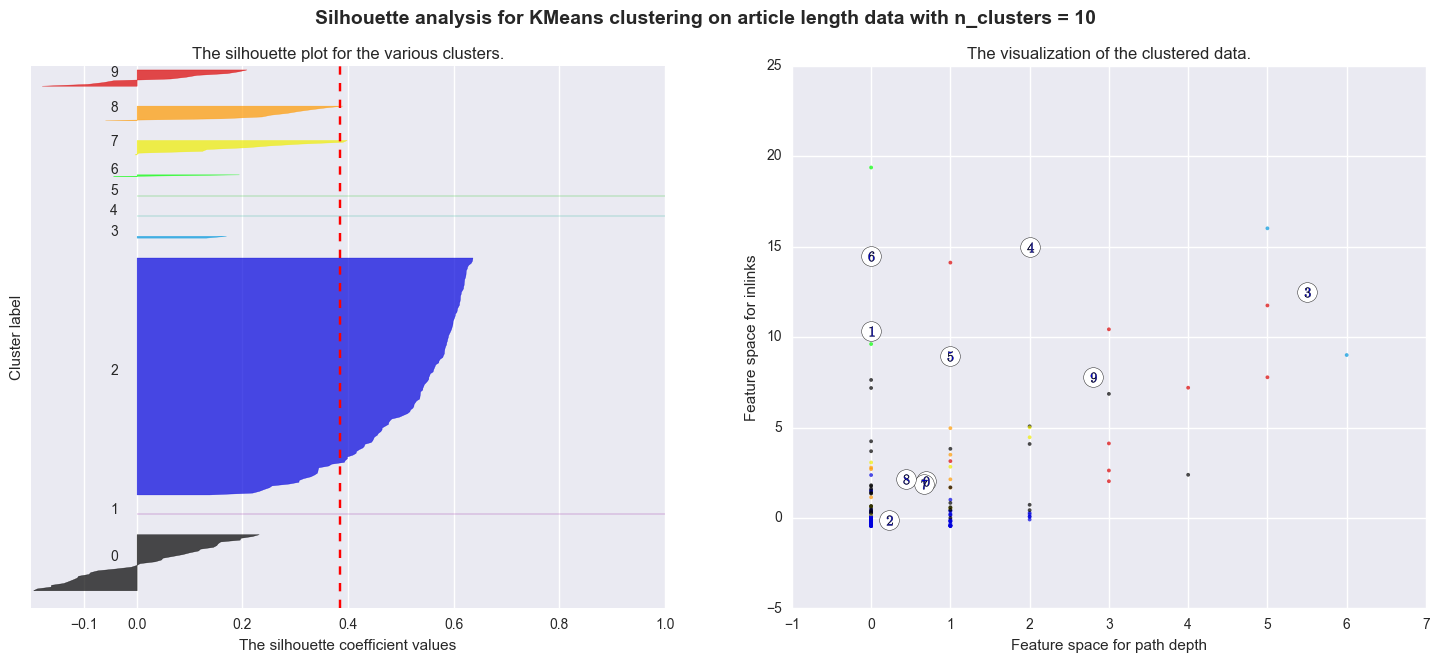

In [89]:
clust_array = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)
    clust_array.append({'cnum':n_clusters,'centers':clusterer.cluster_centers_,'labels':cluster_labels,'silscore':silhouette_avg})
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(numpy.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples       
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[0], X[1], marker='.', s=30, lw=0, alpha=0.7,
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
    # Labeling the clusters
    centers = clusterer.cluster_centers_  
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for path depth")
        ax2.set_ylabel("Feature space for inlinks")
        plt.suptitle(("Silhouette analysis for KMeans clustering on article length data "
                  "with n_clusters = %d" % n_clusters % silhouette_avg),
                 fontsize=14, fontweight='bold')
        filnum = str(n_clusters)
        plt.savefig('ALL_ClusterTests_Clust_No-'+filnum+'.png')
    plt.show()

In [ ]:
sildf = pandas.DataFrame(clust_array)
sildf

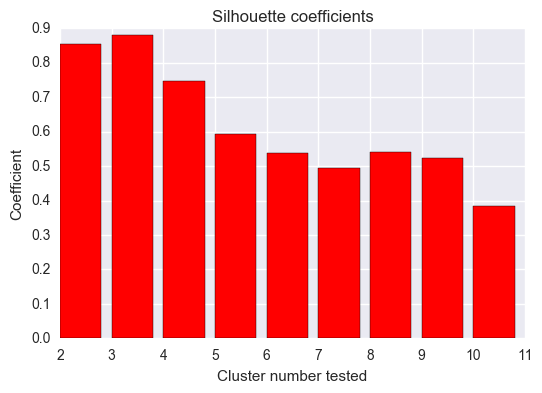

In [84]:

sil1 = range_n_clusters
sil2 = sildf['silscore']
plt.bar(sil1, sil2, color='red')
plt.title('Silhouette coefficients')
plt.xlabel('Cluster number tested')
plt.ylabel('Coefficient')
plt.show()

# Finding Correlation of Features

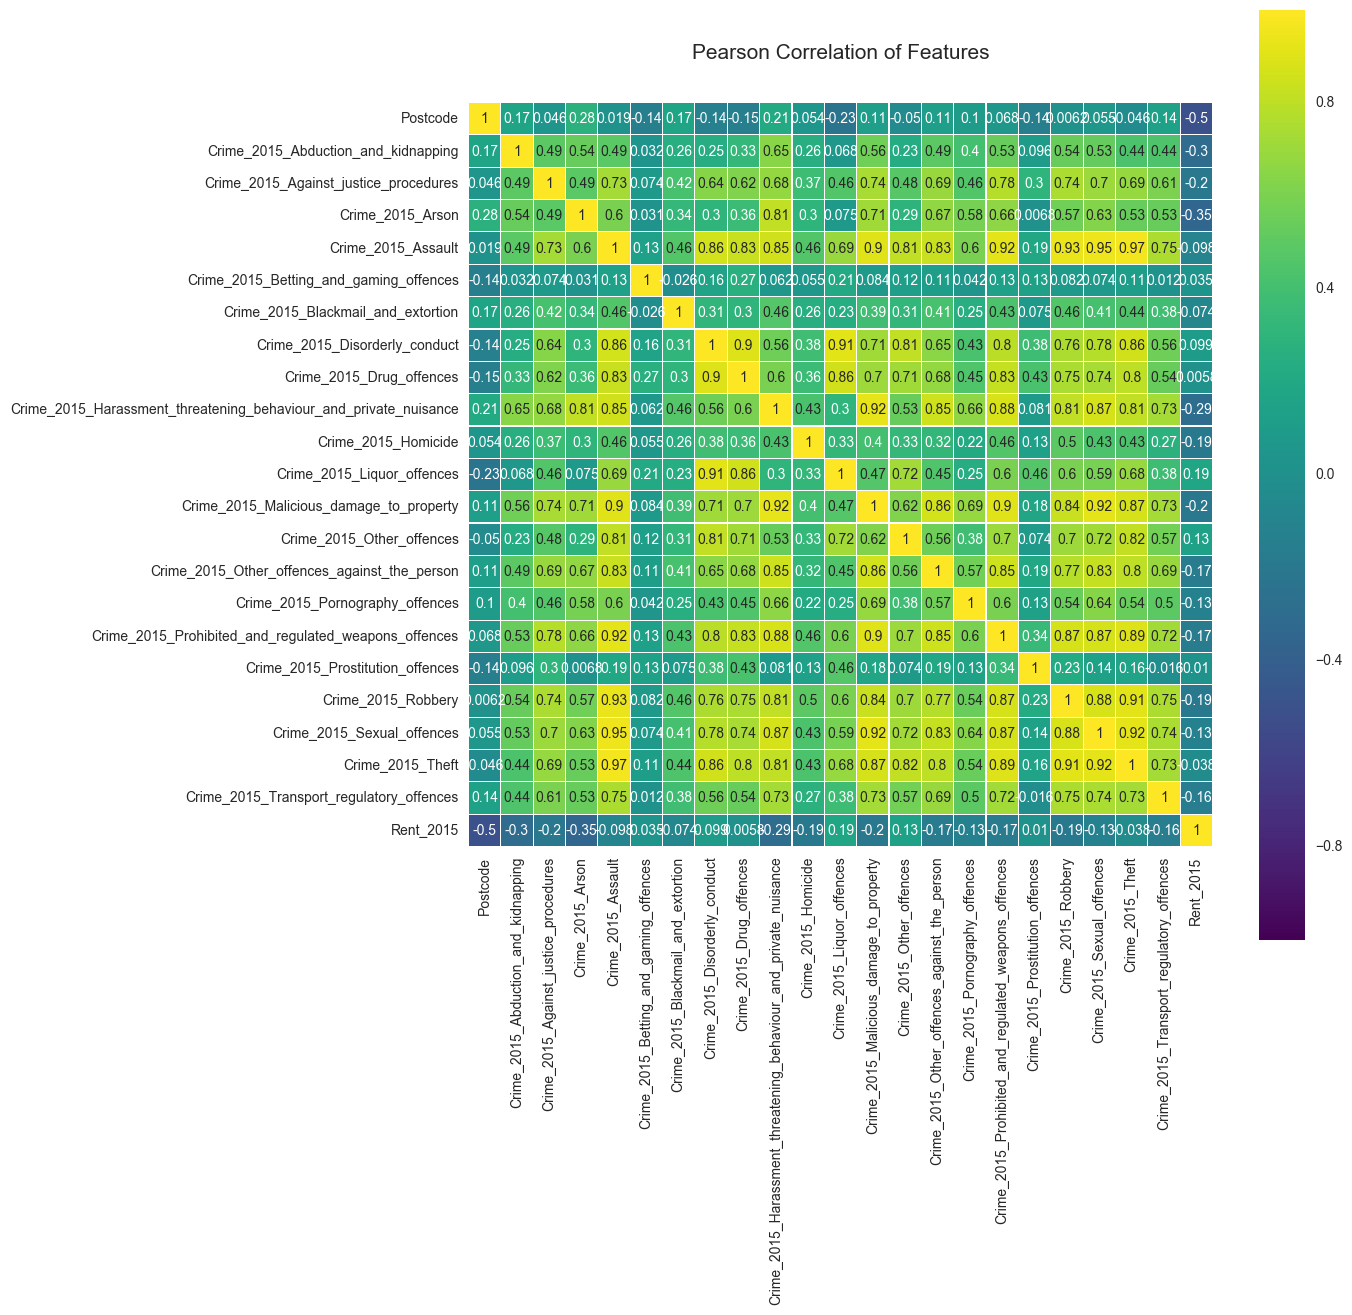

In [24]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(Rent_vs_Crime2015.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

# Running Regressors

In [25]:
import sklearn.tree

In [26]:
dtc = sklearn.tree.DecisionTreeRegressor(max_depth=2)

In [27]:
X = Rent_vs_Crime2014[['Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting_and_gaming_offences',
       'Crime_2014_Blackmail_and_extortion',
       'Crime_2014_Disorderly_conduct', 'Crime_2014_Drug_offences',
       'Crime_2014_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor_offences',
       'Crime_2014_Malicious_damage_to_property',
       'Crime_2014_Other_offences',
       'Crime_2014_Other_offences_against_the_person',
       'Crime_2014_Pornography_offences',
       'Crime_2014_Prohibited_and_regulated_weapons_offences',
       'Crime_2014_Prostitution_offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual_offences', 'Crime_2014_Theft',
       'Crime_2014_Transport_regulatory_offences']]
y = Rent_vs_Crime2014.Rent_2014
dtc.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [28]:
dtc.feature_importances_



array([ 0.        ,  0.        ,  0.2159199 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.60203929,  0.        ,  0.18204081,  0.        ])

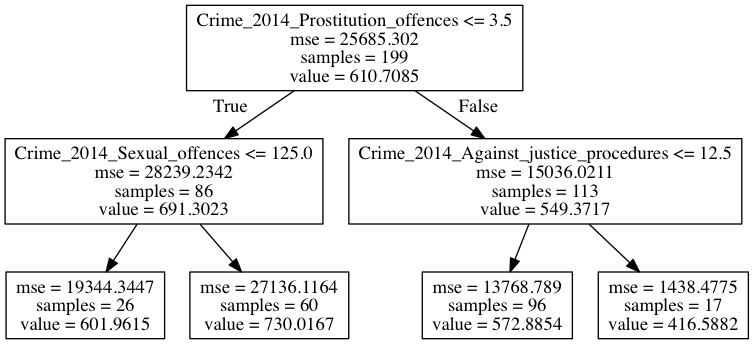

In [29]:
try:
 from StringIO import StringIO
except ImportError:
 from io import StringIO
import sklearn.tree
import IPython.display
import pydot
File_obj = StringIO()
sklearn.tree.export_graphviz(dtc, out_file=File_obj, feature_names=['Postcode', 'Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting_and_gaming_offences',
       'Crime_2014_Blackmail_and_extortion',
       'Crime_2014_Disorderly_conduct', 'Crime_2014_Drug_offences',
       'Crime_2014_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor_offences',
       'Crime_2014_Malicious_damage_to_property',
       'Crime_2014_Other_offences',
       'Crime_2014_Other_offences_against_the_person',
       'Crime_2014_Pornography_offences',
       'Crime_2014_Prohibited_and_regulated_weapons_offences',
       'Crime_2014_Prostitution_offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual_offences', 'Crime_2014_Theft',
       'Crime_2014_Transport_regulatory_offences'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [30]:
import sklearn.grid_search
brute_force = sklearn.grid_search.GridSearchCV(
    sklearn.tree.DecisionTreeRegressor(),
    param_grid = {
        'max_depth': [1,2,3,4,5,6,7,8,9,10,20]
        
        
    },
    cv=10
    )
brute_force.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [31]:
brute_force.best_params_



{'max_depth': 3}

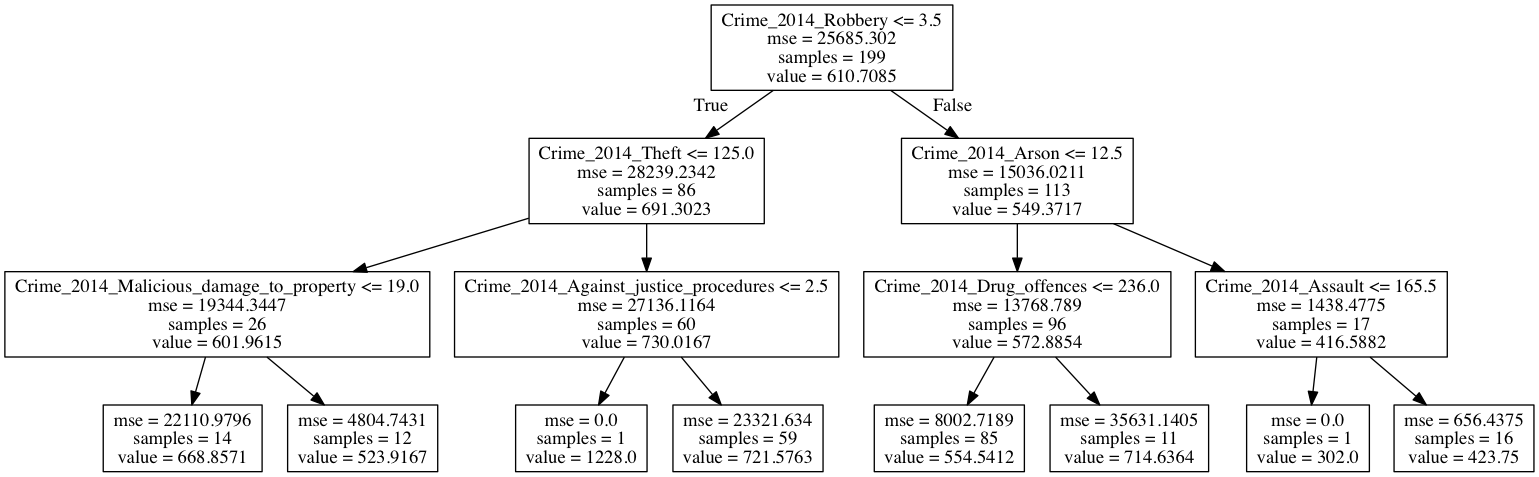

In [32]:
File_obj = StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, 
                             out_file=File_obj, feature_names=['Crime_2014_Abduction_and_kidnapping',
       'Crime_2014_Against_justice_procedures', 'Crime_2014_Arson',
       'Crime_2014_Assault', 'Crime_2014_Betting_and_gaming_offences',
       'Crime_2014_Blackmail_and_extortion',
       'Crime_2014_Disorderly_conduct', 'Crime_2014_Drug_offences',
       'Crime_2014_Harassment_threatening_behaviour_and_private_nuisance',
       'Crime_2014_Homicide', 'Crime_2014_Liquor_offences',
       'Crime_2014_Malicious_damage_to_property',
       'Crime_2014_Other_offences',
       'Crime_2014_Other_offences_against_the_person',
       'Crime_2014_Pornography_offences',
       'Crime_2014_Prohibited_and_regulated_weapons_offences',
       'Crime_2014_Prostitution_offences', 'Crime_2014_Robbery',
       'Crime_2014_Sexual_offences', 'Crime_2014_Theft',
       'Crime_2014_Transport_regulatory_offences'])
Graph = pydot.graph_from_dot_data(File_obj.getvalue())
IPython.display.Image(Graph.create_png())

In [33]:
import sklearn.ensemble

In [34]:
brute_force = sklearn.grid_search.GridSearchCV(
sklearn.ensemble.RandomForestRegressor(),
    param_grid = {
    'n_estimators' :[1,5,10,20,30,40],
   'max_depth':[2,5,10,20],
    'max_features':[2,3,4]
        }
)

In [35]:
brute_force.fit(X,y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [1, 5, 10, 20, 30, 40], 'max_features': [2, 3, 4], 'max_depth': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [36]:
brute_force.best_params_

{'max_depth': 5, 'max_features': 2, 'n_estimators': 30}

## This score seems wierd

In [37]:
brute_force.best_score_

-1.9240664813352655

In [38]:
brute_force.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features=2, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

# Running Classifiers ( found code in Kaggle )

In [49]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Going to use these 5 base models for the stacking
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.cross_validation import KFold;

In [50]:
# Some useful parameters which will come in handy later on
ntrain = Rent_vs_Crime2015.shape[0]
ntest = Rent_vs_Crime2014.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)
    
# Class to extend XGboost classifer

In [51]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [52]:
# Put in our parameters for said classifiers
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

In [53]:

# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=SEED, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=SEED, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=SEED, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=SEED, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=SEED, params=svc_params)

In [77]:
# Create Numpy arrays of train, test and target ( Survived) dataframes to feed into our models
y_train = Rent_vs_Crime2014['Postcode'].ravel()
train = Rent_vs_Crime2014.drop(['Postcode'], axis=1)
x_train = Rent_vs_Crime2014.values # Creates an array of the train data
x_test = Rent_vs_Crime2015.values # Creats an array of the test data

In [78]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

Training is complete


In [56]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

[ 0.06049704  0.01713102  0.05719719  0.03873599  0.04612742  0.0079796
  0.0218849   0.05008074  0.0454205   0.05530954  0.00999356  0.04186819
  0.06507149  0.06422153  0.03433224  0.02247221  0.05073112  0.00869454
  0.03475445  0.05187617  0.05900749  0.04285123  0.11376181]
[ 0.05338788  0.0318339   0.04583381  0.04996546  0.0469876   0.00618438
  0.04471003  0.04082761  0.03174186  0.05134008  0.02307373  0.03304739
  0.05821561  0.04808055  0.04199113  0.04452587  0.04529987  0.03568074
  0.043909    0.05556707  0.04429361  0.04104753  0.08245529]
[ 0.044  0.056  0.046  0.014  0.044  0.     0.01   0.008  0.06   0.096  0.
  0.008  0.008  0.054  0.002  0.     0.006  0.     0.006  0.002  0.07
  0.044  0.422]
[  1.55716204e-02   1.83358143e-04   1.34306881e-02   4.83807247e-04
   7.22876261e-04   1.34136767e-04   2.55468842e-04   9.97844382e-04
   1.44591720e-03   7.00106549e-03   2.58555811e-05   1.08061384e-03
   8.23850244e-04   1.36416884e-03   8.70780025e-04   6.35861878e-04
  

In [63]:
rf_features = [ 0.06049704  ,0.01713102 , 0.05719719,  0.03873599,  0.04612742 , 0.0079796,
  0.0218849,   0.05008074 , 0.0454205,   0.05530954,  0.00999356,  0.04186819,
  0.06507149 , 0.06422153 , 0.03433224  ,0.02247221,  0.05073112,  0.00869454,
  0.03475445 , 0.05187617 , 0.05900749 , 0.04285123 , 0.11376181]
et_features = [ 0.05338788 , 0.0318339 ,  0.04583381 , 0.04996546,  0.0469876 ,  0.00618438,
  0.04471003,  0.04082761  ,0.03174186,  0.05134008,  0.02307373,  0.03304739,
  0.05821561,  0.04808055,  0.04199113,  0.04452587,  0.04529987,  0.03568074,
  0.043909,    0.05556707,  0.04429361,  0.04104753,  0.08245529]
ada_features = [ 0.044,  0.056 , 0.046,  0.014,  0.044,  0.  ,   0.01,   0.008 , 0.06 ,  0.096 , 0.,
  0.008 , 0.008,  0.054,  0.002,  0.,     0.006,  0. ,    0.006,  0.002,  0.07,
  0.044,  0.422]
gb_features = [  1.55716204e-02,   1.83358143e-04 ,  1.34306881e-02 ,  4.83807247e-04,
   7.22876261e-04  , 1.34136767e-04 ,  2.55468842e-04  , 9.97844382e-04,
   1.44591720e-03 ,  7.00106549e-03 ,  2.58555811e-05  , 1.08061384e-03,
   8.23850244e-04 ,  1.36416884e-03 ,  8.70780025e-04  , 6.35861878e-04,
   8.36605732e-04 ,  1.84820107e-04 ,  1.00999558e-03  , 9.87767353e-04,
   8.09630906e-04 ,  7.57926491e-03 ,  2.94770456e-02]

In [74]:
cols = Rent_vs_Crime2014.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })
feature_dataframe

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features
0,0.044,0.053388,0.015572,0.060497,Postcode
1,0.056,0.031834,0.000183,0.017131,Crime_2014_Abduction_and_kidnapping
2,0.046,0.045834,0.013431,0.057197,Crime_2014_Against_justice_procedures
3,0.014,0.049965,0.000484,0.038736,Crime_2014_Arson
4,0.044,0.046988,0.000723,0.046127,Crime_2014_Assault
5,0.000,0.006184,0.000134,0.007980,Crime_2014_Betting_and_gaming_offences
6,0.010,0.044710,0.000255,0.021885,Crime_2014_Blackmail_and_extortion
7,0.008,0.040828,0.000998,0.050081,Crime_2014_Disorderly_conduct
8,0.060,0.031742,0.001446,0.045421,Crime_2014_Drug_offences
9,0.096,0.051340,0.007001,0.055310,Crime_2014_Harassment_threatening_behaviour_an...


In [67]:
# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Random Forest feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Random Forest feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Extra Trees  feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Extra Trees  feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Extra Trees Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['AdaBoost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['AdaBoost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'AdaBoost Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

# Scatter plot 
trace = go.Scatter(
    y = feature_dataframe['Gradient Boost feature importances'].values,
    x = feature_dataframe['features'].values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 25,
#       size= feature_dataframe['AdaBoost feature importances'].values,
        #color = np.random.randn(500), #set color equal to a variable
        color = feature_dataframe['Gradient Boost feature importances'].values,
        colorscale='Portland',
        showscale=True
    ),
    text = feature_dataframe['features'].values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [70]:

feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

,AdaBoost feature importances,Extra Trees feature importances,Gradient Boost feature importances,Random Forest feature importances,features,mean
0,0.044,0.053388,0.015572,0.060497,Postcode,0.043364
1,0.056,0.031834,0.000183,0.017131,Crime_2014_Abduction_and_kidnapping,0.026287
2,0.046,0.045834,0.013431,0.057197,Crime_2014_Against_justice_procedures,0.040615
3,0.014,0.049965,0.000484,0.038736,Crime_2014_Arson,0.025796
4,0.044,0.046988,0.000723,0.046127,Crime_2014_Assault,0.034459
5,0.000,0.006184,0.000134,0.007980,Crime_2014_Betting_and_gaming_offences,0.003575
6,0.010,0.044710,0.000255,0.021885,Crime_2014_Blackmail_and_extortion,0.019213
7,0.008,0.040828,0.000998,0.050081,Crime_2014_Disorderly_conduct,0.024977
8,0.060,0.031742,0.001446,0.045421,Crime_2014_Drug_offences,0.034652
9,0.096,0.051340,0.007001,0.055310,Crime_2014_Harassment_threatening_behaviour_an...,0.052413


In [71]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [72]:
y = feature_dataframe['mean'].values
x = feature_dataframe['features'].values
data = [go.Bar(
            x= x,
             y= y,
            width = 0.5,
            marker=dict(
               color = feature_dataframe['mean'].values,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
#     xaxis= dict(
#         title= 'Pop',
#         ticklen= 5,
#         zeroline= False,
#         gridwidth= 2,
#     ),
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')